# B1. EXPLORATORY DATA ANALYSIS 

__1.1 Importing Libraries and Dataset__

__1.2 Exploratory Data Analysis__
    
    1.2.1 Initial Exploration of the Dataset
    1.2.2 Histograms
    1.2.3 Scatterplots with fitted line
    1.2.4 Correlation Matrix
    1.2.5 Variance Inflation Factor

## 1.1 Importing Libraries and Dataset

In [1]:
# Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from statsmodels.tools.tools import add_constant

import warnings

warnings.simplefilter(action='ignore', category = FutureWarning)
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)

In [2]:
# Dataset

data = pd.read_csv("Blood_Glucose_Dataset.csv") 
df = data.copy()
df.head(5)

,Post Operative Glucose,Sex,Age,BMI,Smoking,Pre Operative Fast,Cort,Pre Operative Glucose,LV,ASA
0,114,1,64,22.49,0.0,13.92,0,111,2,3
1,140,0,25,21.97,0.0,12.00,1,85,2,2
2,199,0,53,18.90,0.0,15.00,1,106,1,2
3,127,1,76,23.94,100.0,11.50,0,84,1,3
4,120,0,47,20.20,40.0,15.25,1,94,1,3


## 1.2 Exploratory Data Analysis

### 1.2.1 Initial Exploration of the Dataset

In [3]:
# Descriptive Statistics

round(df.describe(),2)

,Post Operative Glucose,Sex,Age,BMI,Smoking,Pre Operative Fast,Cort,Pre Operative Glucose,LV,ASA
count,235.00,235.00,235.00,235.00,235.00,235.00,235.00,235.00,235.00,235.00
mean,132.48,0.57,60.78,27.36,25.75,13.53,0.23,99.88,1.11,2.56
std,32.54,0.50,14.68,5.19,30.42,1.96,0.42,13.99,0.32,0.58
min,79.00,0.00,17.00,17.40,0.00,10.92,0.00,70.00,1.00,1.00
25%,111.00,0.00,54.50,23.76,0.00,11.42,0.00,92.00,1.00,2.00
50%,129.00,1.00,64.00,26.73,17.00,13.50,0.00,97.00,1.00,3.00
75%,147.00,1.00,72.00,30.54,40.00,15.08,0.00,106.00,1.00,3.00
max,316.00,1.00,84.00,43.28,140.00,17.67,1.00,204.00,2.00,4.00


In [4]:
# Assigning the Descriptive Statistics to a variable

Des_stats = round(df.describe(),2).transpose()
Des_stats

,count,mean,std,min,25%,50%,75%,max
Post Operative Glucose,235.0,132.48,32.54,79.00,111.00,129.00,147.00,316.00
Sex,235.0,0.57,0.50,0.00,0.00,1.00,1.00,1.00
Age,235.0,60.78,14.68,17.00,54.50,64.00,72.00,84.00
BMI,235.0,27.36,5.19,17.40,23.76,26.73,30.54,43.28
Smoking,235.0,25.75,30.42,0.00,0.00,17.00,40.00,140.00
Pre Operative Fast,235.0,13.53,1.96,10.92,11.42,13.50,15.08,17.67
Cort,235.0,0.23,0.42,0.00,0.00,0.00,0.00,1.00
Pre Operative Glucose,235.0,99.88,13.99,70.00,92.00,97.00,106.00,204.00
LV,235.0,1.11,0.32,1.00,1.00,1.00,1.00,2.00
ASA,235.0,2.56,0.58,1.00,2.00,3.00,3.00,4.00


In [5]:
# Saving the Descriptive Statistics

Des_stats.to_csv(r'Des_Stats.csv', index=True)

In [6]:
# Checking the data types

df.dtypes 

Post Operative Glucose      int64
Sex                         int64
Age                         int64
BMI                       float64
Smoking                   float64
Pre Operative Fast        float64
Cort                        int64
Pre Operative Glucose       int64
LV                          int64
ASA                         int64
dtype: object

In [7]:
# Checking for missing values

df.isnull().sum() 

Post Operative Glucose    0
Sex                       0
Age                       0
BMI                       0
Smoking                   0
Pre Operative Fast        0
Cort                      0
Pre Operative Glucose     0
LV                        0
ASA                       0
dtype: int64

### 1.2.2 Histograms

In [8]:
# Function that diplays the histogram of a variable

def display_variable_hist(Variable, color):
    
    sns.set_style("white")
    
    plt.figure(figsize=(5,4))
    
    plt.hist(df[Variable], bins = 10, color = color)
    
    plt.title(label = "Distribution of " + Variable, fontsize = 14, weight = 'bold')
    
    sns.despine()
    
    plt.show()

In [9]:
# Creating a list that holds the columns' names

Variable_names = df.columns
Variable_names

Index(['Post Operative Glucose', 'Sex', 'Age', 'BMI', 'Smoking',
       'Pre Operative Fast', 'Cort', 'Pre Operative Glucose', 'LV', 'ASA'],
      dtype='object')

In [10]:
# Creating a color palette for the plots

color_list = ["red", "chocolate","orange", "gold", "limegreen", 
              "deepskyblue", "pink", 'purple', 'blue', 'green','black']

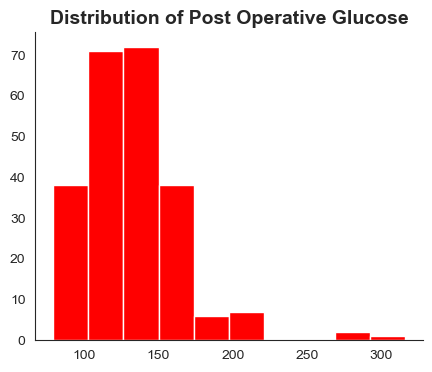

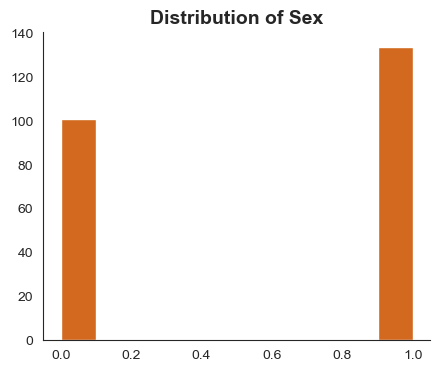

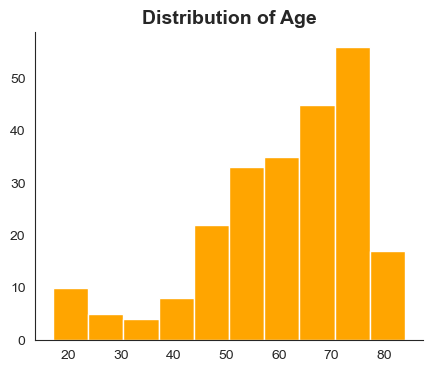

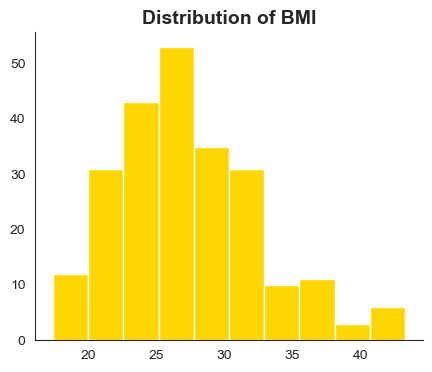

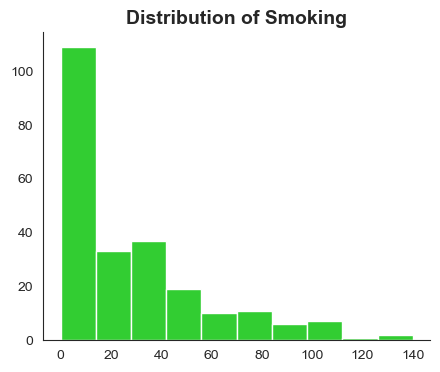

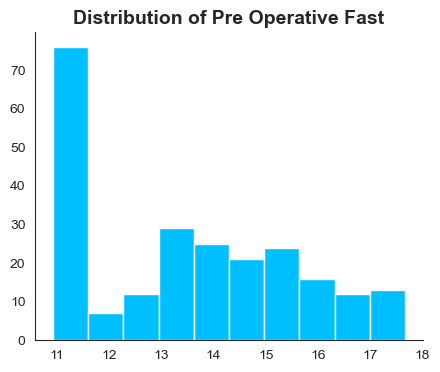

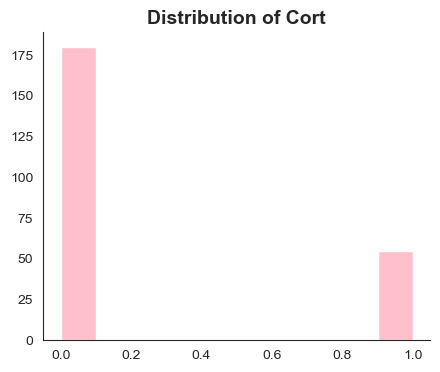

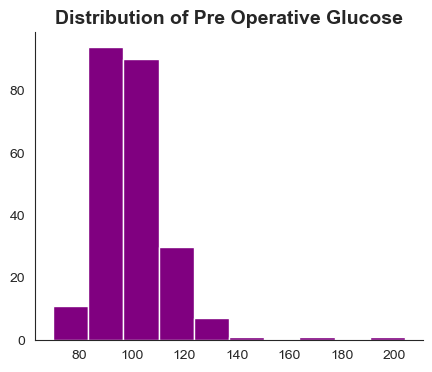

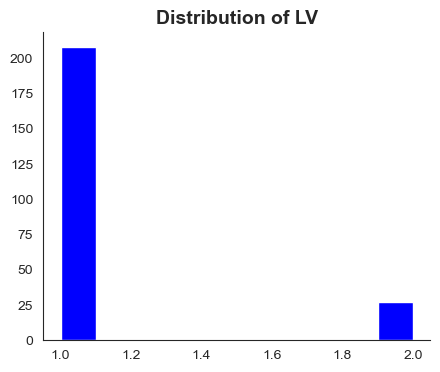

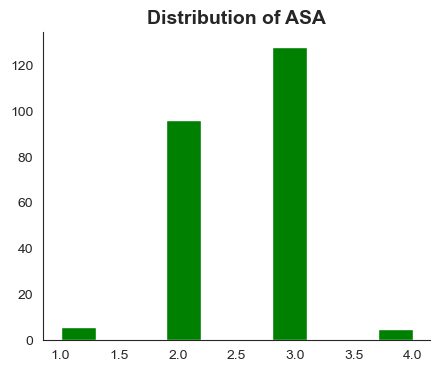

In [11]:
# Displaying the Histogram of each Variable

for i in range(0, len(Variable_names)):
    display_variable_hist(Variable_names[i],color_list[i])

### 1.2.3 Scatterplots with fitted line

In [12]:
# Creating a variable list that holds the independent features' names

Independent_variables = list(df.columns)
Independent_variables.remove('Post Operative Glucose') # Removing the target variable
Independent_variables

['Sex',
 'Age',
 'BMI',
 'Smoking',
 'Pre Operative Fast',
 'Cort',
 'Pre Operative Glucose',
 'LV',
 'ASA']

In [13]:
# Getting a sample from the dataframe for the scatterplots

sample = df.sample(axis= 0, frac = 0.5, random_state = 126)
sample.head()

,Post Operative Glucose,Sex,Age,BMI,Smoking,Pre Operative Fast,Cort,Pre Operative Glucose,LV,ASA
101,129,1,49,22.45,47.0,11.33,1,102,1,2
220,120,1,63,30.84,50.0,14.25,0,111,1,3
225,131,0,60,31.60,20.5,11.25,0,97,1,2
207,89,1,57,29.28,0.0,13.17,0,89,1,3
188,151,1,54,25.88,0.0,11.33,0,91,1,2


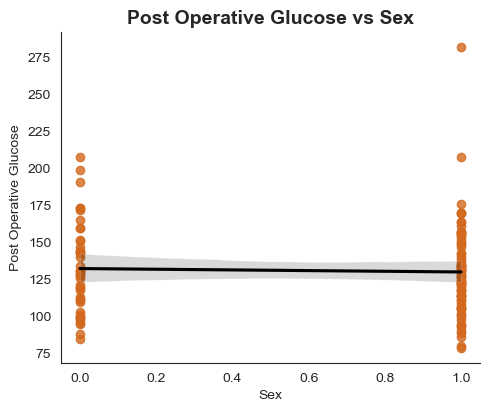

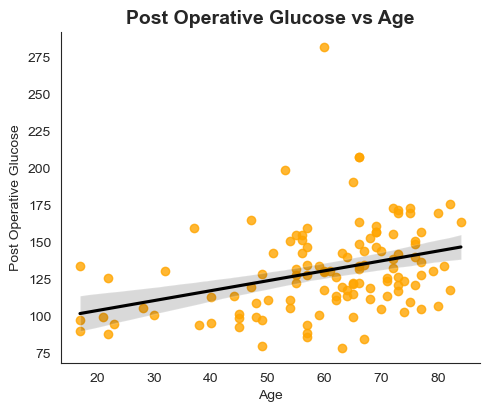

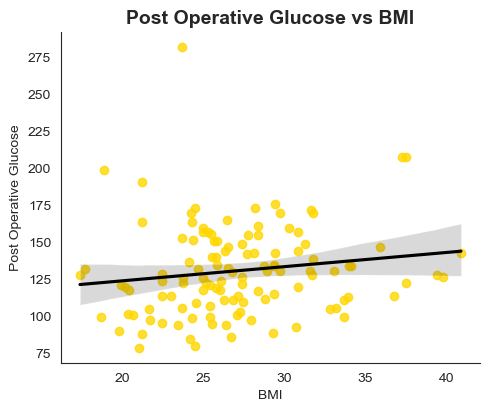

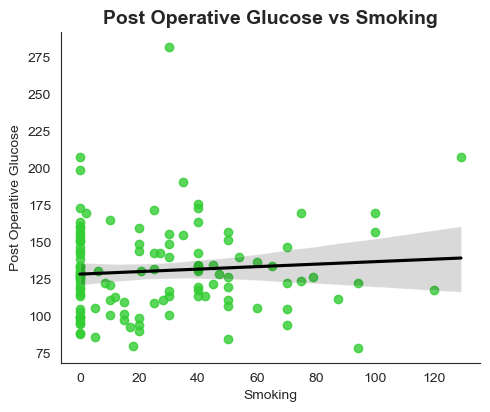

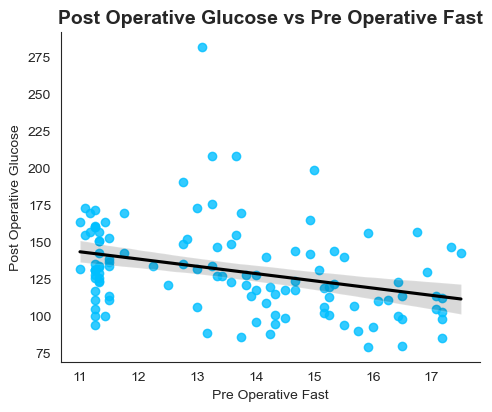

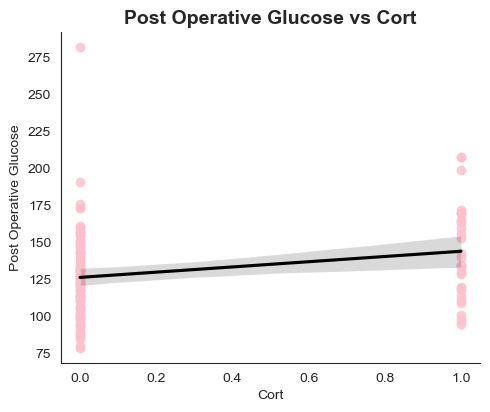

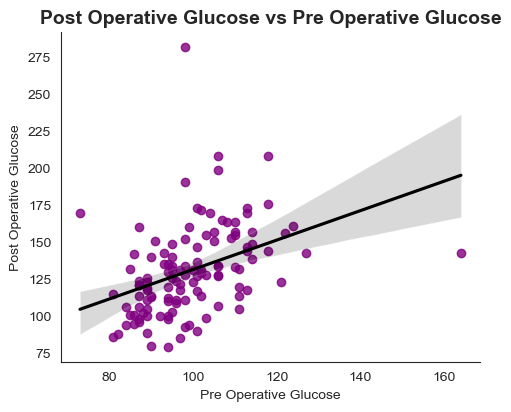

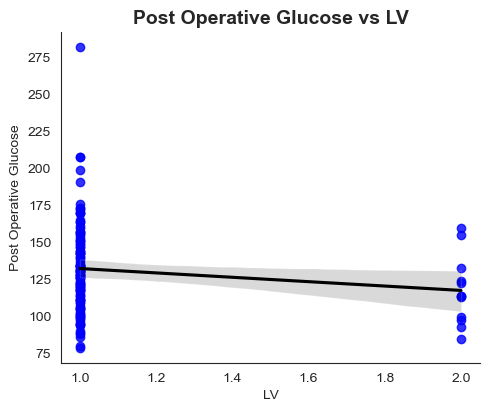

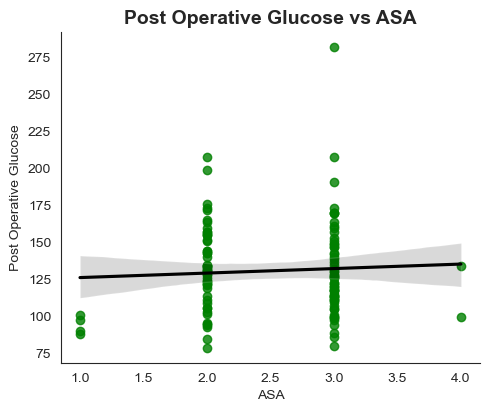

In [14]:
# Creating the scatterplots 

for i in range(0,len(Independent_variables)):
    
    x = sample[Independent_variables[i]]
    y = sample['Post Operative Glucose']
   

    sns.lmplot(x = Independent_variables[i], y = 'Post Operative Glucose' ,
               data = sample, height = 4, aspect = 1.25,
               scatter_kws = {'color' : color_list[i + 1]},
              line_kws = {'color' : 'black'})
    

    plt.title('Post Operative Glucose vs ' + Independent_variables[i], 
              fontsize = 14, weight = 'bold')
    
    sns.despine()
    plt.show()

### 1.2.4 Correlation Matrix

In [15]:
# Function that displays correlation matrix

def display_corr(dataframe):
    sns.set(rc = {'figure.figsize':(15,10)})
    sns.heatmap(data = dataframe.corr(),
          annot = True,
         fmt = '.2g',
         center = 0,
          cmap = 'coolwarm',
          linewidths = 1, linecolor = 'black')
    plt.title("Correlation Matrix", fontsize = 14, weight = 'bold')

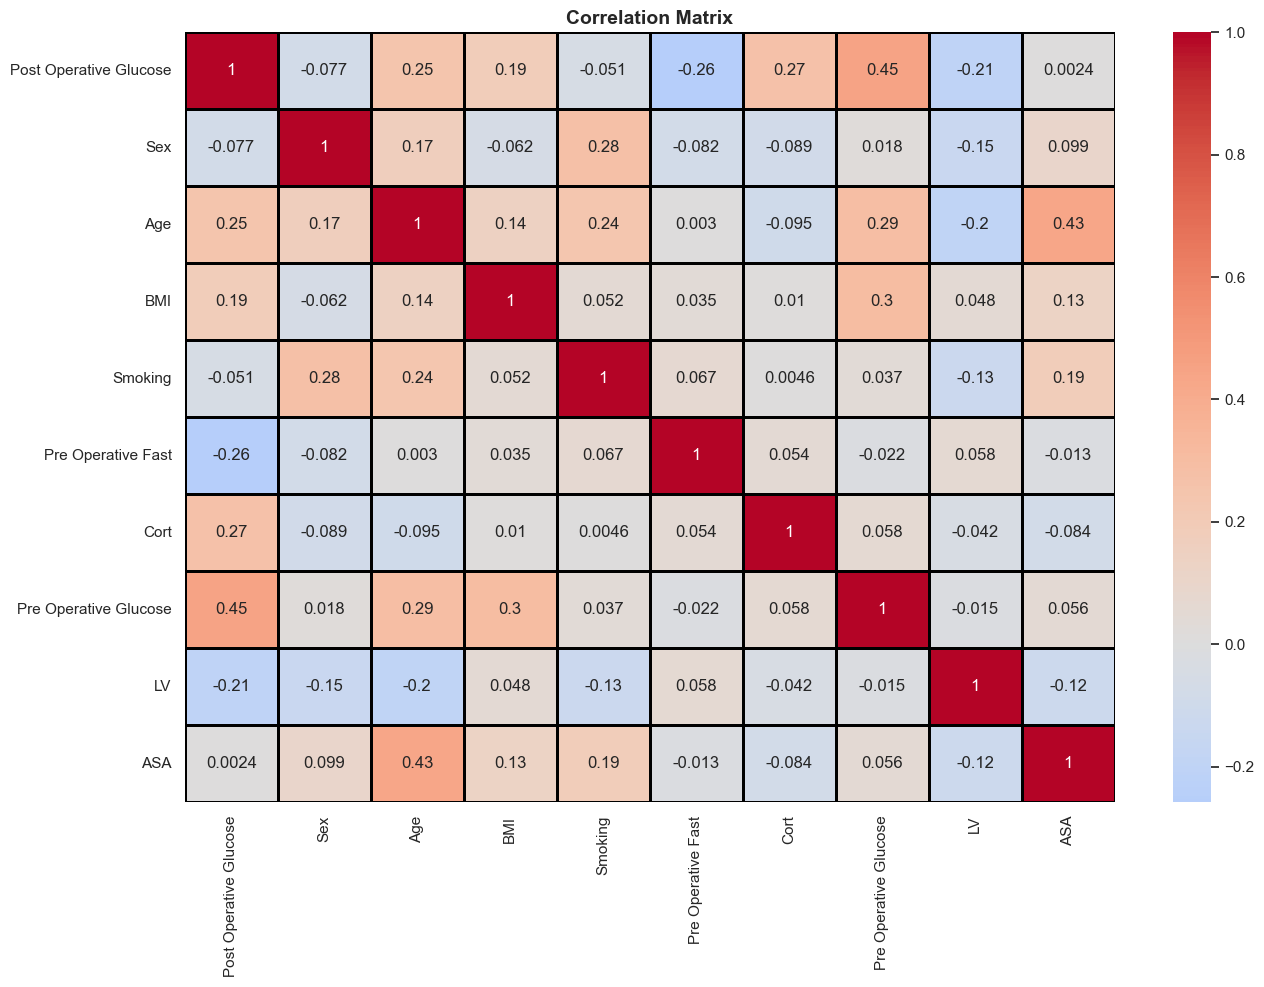

In [16]:
# Displaying the correlation matrix 

display_corr(df)

### 1.2.5 Variance Inflation Factor

In [17]:
# Variance Inflation Factor (VIF) Calculation

# *The Variance Inflation Factor (VIF) was omitted from the final version of the thesis.

A = add_constant(df)  
ds = pd.Series([variance_inflation_factor(A.values, i)
                for i in range(A.shape[1])],   
                  index=A.columns) 
ds = ds.round(3)
ds = ds.to_frame(name = 'VIF')
ds

,VIF
const,160.180
Post Operative Glucose,1.702
Sex,1.153
Age,1.520
BMI,1.139
Smoking,1.168
Pre Operative Fast,1.141
Cort,1.147
Pre Operative Glucose,1.425
LV,1.129
